<a href="https://colab.research.google.com/github/mahmoudmoe84/data-science/blob/master/s03a_unsupervised_clustering_kmeans_case_study_bank_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning | Clustering (K-Means) | Case-study

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bank Customer / Marketing Segmentation [Clustering (K-Means)]

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Loading & Inspecting Data

In [ ]:
# Load the data & check what's inside
bank_loans = pd.read_csv('/content/drive/MyDrive/Copy of bank-customers.csv')
bank_loans.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploring Data

In [ ]:
bank_loans['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [ ]:
bank_loans['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
bank_loans.shape

(41188, 21)

In [ ]:
bank_loans.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [ ]:
bank_loans['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [ ]:
bank_loans['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [ ]:
bank_loans['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [ ]:
bank_loans['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [ ]:
bank_loans['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [ ]:
bank_loans['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
bank_loans.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bank_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

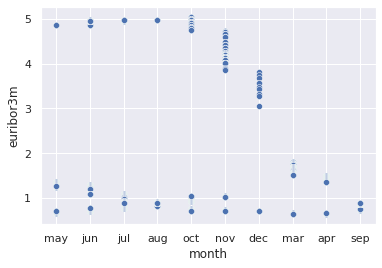

In [ ]:
sns.scatterplot(data=bank_loans,x='month',y='euribor3m')

### Data Preprocessing

In [ ]:
subscribed_new = pd.get_dummies(bank_loans['subscribed'],drop_first=True)

In [ ]:
subscribed_new

,yes
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
bank_loans['subscribed_new'] = subscribed_new

In [ ]:
bank_loans.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,subscribed_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
bank_loans.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
subscribed_new    0
dtype: int64

In [ ]:
bank_model = bank_loans.loc[:,['subscribed_new','campaign','poutcome','previous','duration','month','default','age']]
bank_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subscribed_new  41188 non-null  uint8 
 1   campaign        41188 non-null  int64 
 2   poutcome        41188 non-null  object
 3   previous        41188 non-null  int64 
 4   duration        41188 non-null  int64 
 5   month           41188 non-null  object
 6   default         41188 non-null  object
 7   age             41188 non-null  int64 
dtypes: int64(4), object(3), uint8(1)
memory usage: 2.2+ MB


In [ ]:
bank_model = pd.get_dummies(bank_model)
bank_model

,subscribed_new,campaign,previous,duration,age,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_no,default_unknown,default_yes
0,0,1,0,261,56,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,149,57,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,226,37,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,151,40,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,0,307,56,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,1,0,334,73,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
41184,0,1,0,383,46,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
41185,0,2,0,189,56,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
41186,1,1,0,442,44,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
bank_scaled =StandardScaler()

In [ ]:
bank_model = bank_scaled.fit_transform(bank_model)

### Model Training & Prediction

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
bank_camp = KMeans(n_clusters=2)

In [ ]:
bank_camp.fit(bank_model)

KMeans(n_clusters=2)

In [ ]:
bank_camp.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
bank_loans['clusters_new'] = bank_camp.labels_

In [ ]:
correction= []
for i in range(len(bank_loans['clusters_new'])):
  if bank_loans['subscribed_new'][i] != bank_loans['clusters_new'][i]:
    correction.append(i)

len(correction)/len(bank_loans['clusters_new'])
# model clustered the outcome of subscribtion with an accuracy of 82% in comparison to previously known outcome
# however, model will cluster customers differently between active subscribed , passive subscribed , active no subscription , passive no subscription , no phone , no answer , etc which is a wider scope)

0.1764348839467806

[link text](https://)### Finding the Optimal Number of Clusters (Elbow / Knee Method)

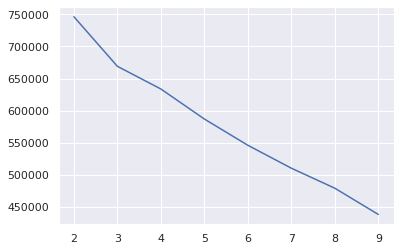

In [ ]:
wcss=[]
for i in range(2,10):
  bank_camp = KMeans(n_clusters=i)
  bank_camp.fit(bank_model)
  wcss.append(bank_camp.inertia_)
plt.plot(range(2,10),wcss)


==========

# GOOD LUCK!